In [36]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
from tqdm.autonotebook import tqdm  # Fancy progress bars for our loops!
import fsspec
import cftime
from dask import optimize
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
import pywt

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [38]:
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2' & experiment_id =='historical'")
ds_area = xr.open_zarr(fsspec.get_mapper(df_area.zstore.values[-1]), consolidated=True)
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])

In [39]:
# df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2' & variable_id == 'tas'  & institution_id == 'NCAR'")
df_EW_ncar_his = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'ua' & institution_id == 'NCAR' & experiment_id == 'historical'")
zstore_his = df_EW_ncar_his.zstore.values[-1]
print(zstore_his)
mapper_his = fsspec.get_mapper(zstore_his)
ds_EW_his = xr.open_zarr(mapper_his, consolidated=True)
display(ds_EW_his)

df_NW_ncar_his = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'va' & institution_id == 'NCAR' & experiment_id == 'historical'")
zstore_his = df_NW_ncar_his.zstore.values[-1]
print(zstore_his)
mapper_his = fsspec.get_mapper(zstore_his)
ds_NW_his = xr.open_zarr(mapper_his, consolidated=True)
display(ds_NW_his)


time = np.arange(1850, 2015, 1/12)
# date_threshold = cftime.DatetimeNoLeap(1550, 1, 1)
# ds_tas_his_plt = ds_tas_his.where(ds_tas_his.time > date_threshold, drop=True)
# # weighted product
# tas_timeseries_his = (ds_tas_his_plt.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
# # convert to np array
# array_tas_ts = np.array(tas_timeseries_his)
# # plt.plot(array_tas_ts)
# # plt.show()
# year_tas_ts = np.mean(array_tas_ts.reshape(1980//12, 12), axis=1)
# # plt.plot(year_tas_ts)
# # plt.show()

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r11i1p1f1/Amon/ua/gn/v20190514/


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, plev: 19, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    ua         (time, plev, lat, lon) float32 dask.array<chunksize=(60, 19, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    variable_id:            ua
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/05f2f382-e465-4c2b-9a09-e5e9d4e45c19...
    version_id:             v20190514

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r11i1p1f1/Amon/va/gn/v20190514/


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, plev: 19, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    va         (time, plev, lat, lon) float32 dask.array<chunksize=(60, 19, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    variable_id:            va
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/e5a37320-fde0-40d6-8d15-1b26096a8d6b...
    version_id:             v20190514

## Selected latitude range from 30 to 60 North. All longitudes

In [40]:
wind_u = ds_EW_his.sel(plev=20000)
wind_v = ds_NW_his.sel(plev=20000)

lat_range = ds_EW_his.lat.sel(lat=slice(30, 60))
lon_range = ds_EW_his.lon.sel(lon=slice(0, 360))
# Here I am taking the mean
wind_u_timeseries = (wind_u.ua * ds_area.areacella).sel(lat=lat_range, lon=lon_range).sum(dim=["lat", "lon"]) / total_area
# wind_v_timeseries = (wind_v.va * ds_area.areacella).sel(lat=lat_range, lon=lon_range).sum(dim=["lat", "lon"])

# Don't re-run this cell if lat and lon range not changed. The runtime is 6.5 minutes

In [41]:
# wind_timeseries = wind_timeseries.chunk({'time': 1980})
# wind_timeseries = wind_timeseries.persist()
# wind_timeseries

wind_u_timeseries = wind_u_timeseries.squeeze()  # Removes the 'plev' axis if it's size 1
wind_u_timeseries = wind_u_timeseries.compute()  # Forces computation to memory
wind_u_np = wind_u_timeseries.values  # Fastest way to get NumPy array

# wind_v_timeseries = wind_v_timeseries.squeeze()  # Removes the 'plev' axis if it's size 1
# wind_v_timeseries = wind_v_timeseries.compute()  # Forces computation to memory
# wind_v_np = wind_v_timeseries.values  # Fastest way to get NumPy array

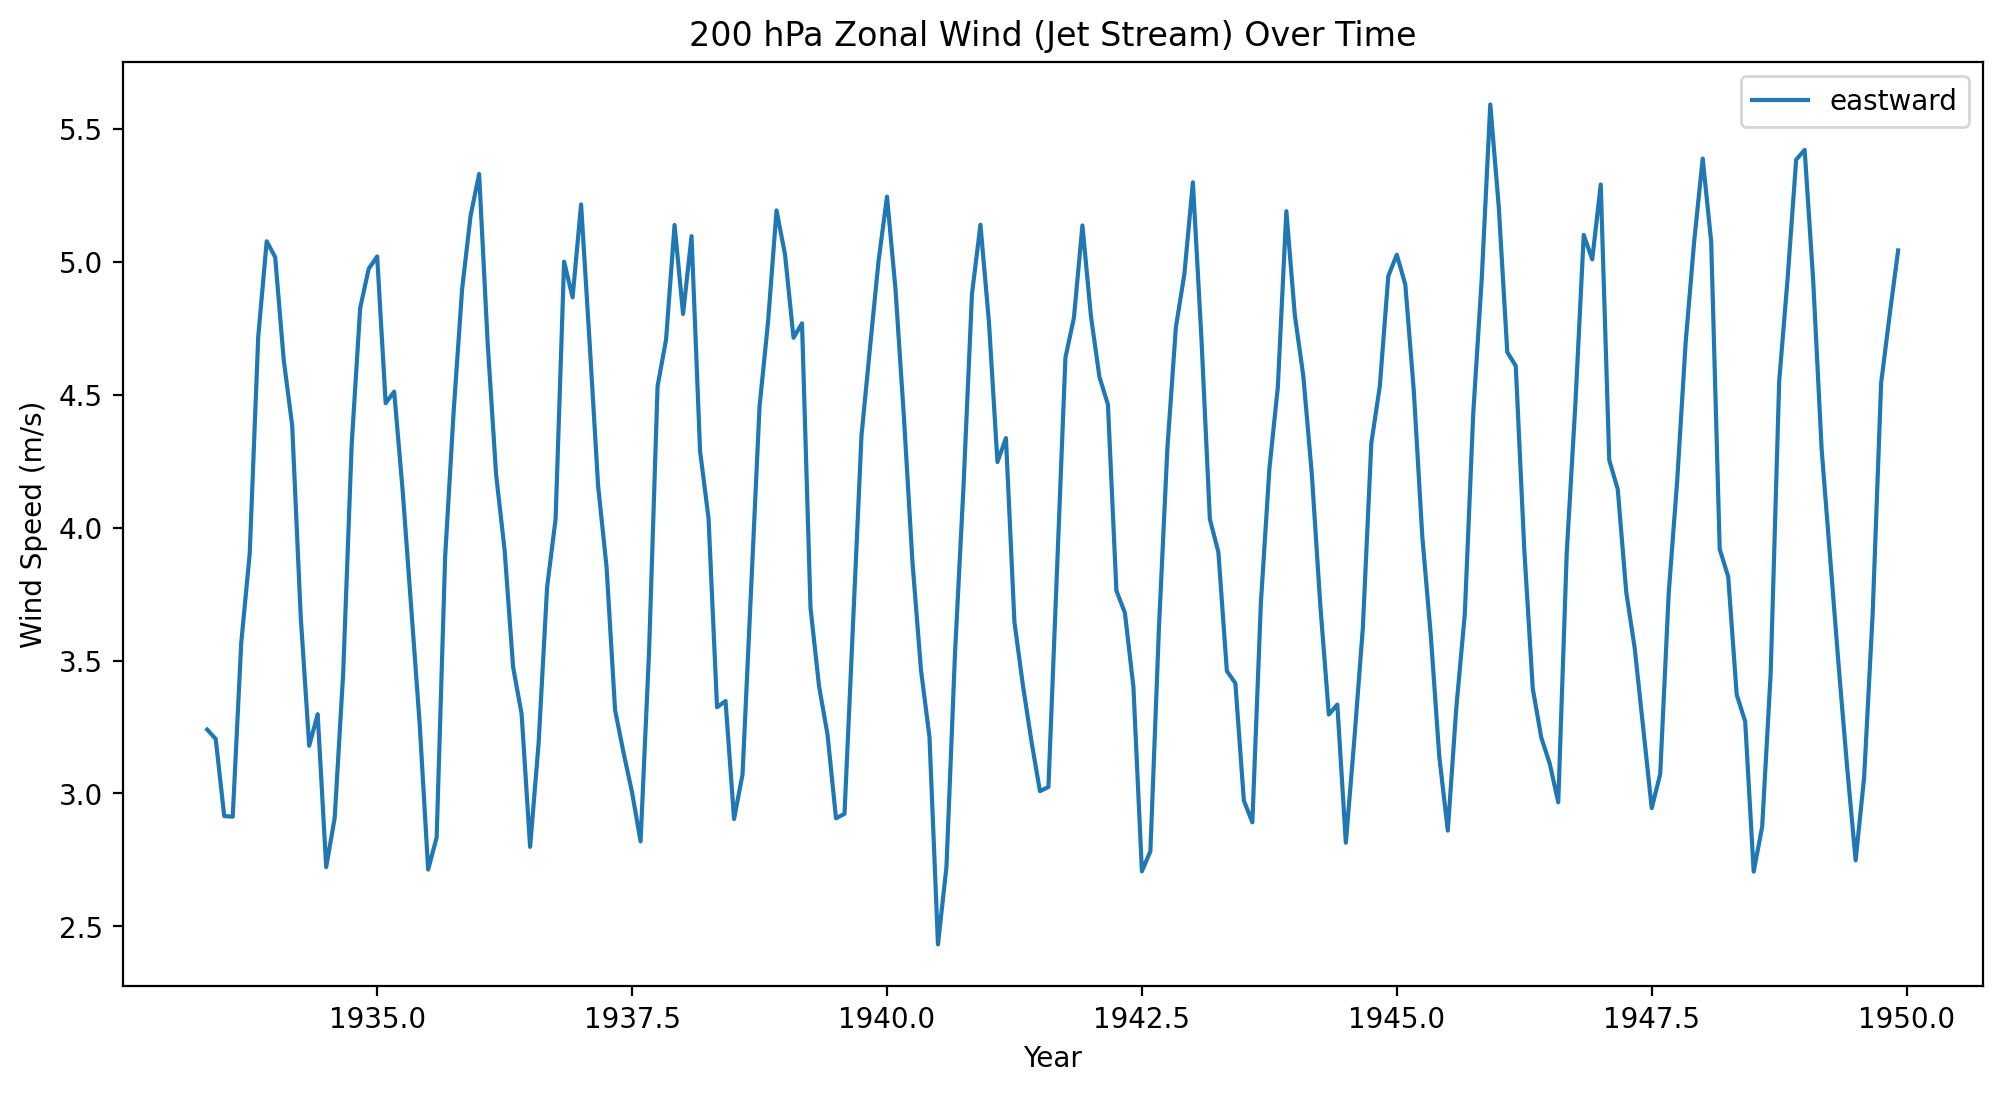

In [57]:
# months = np.array(wind_timeseries.time)
# months = pd.to_datetime(months).astype('datetime64[ns]')
time_left, time_right = 1000, 1200
plt.plot(time[time_left: time_right], wind_u_np[time_left: time_right], label = "eastward")
# plt.plot(time[time_left: time_right], wind_v_np[time_left: time_right], label = "northward")
plt.title("200 hPa Zonal Wind (Jet Stream) Over Time")
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.show()

In [43]:
# Extract wind data
wind_data = wind_u_timeseries.values

wind_data_nmlzd = (wind_data - np.min(wind_data)) / (np.max(wind_data) - np.min(wind_data))  # min-max Normalization

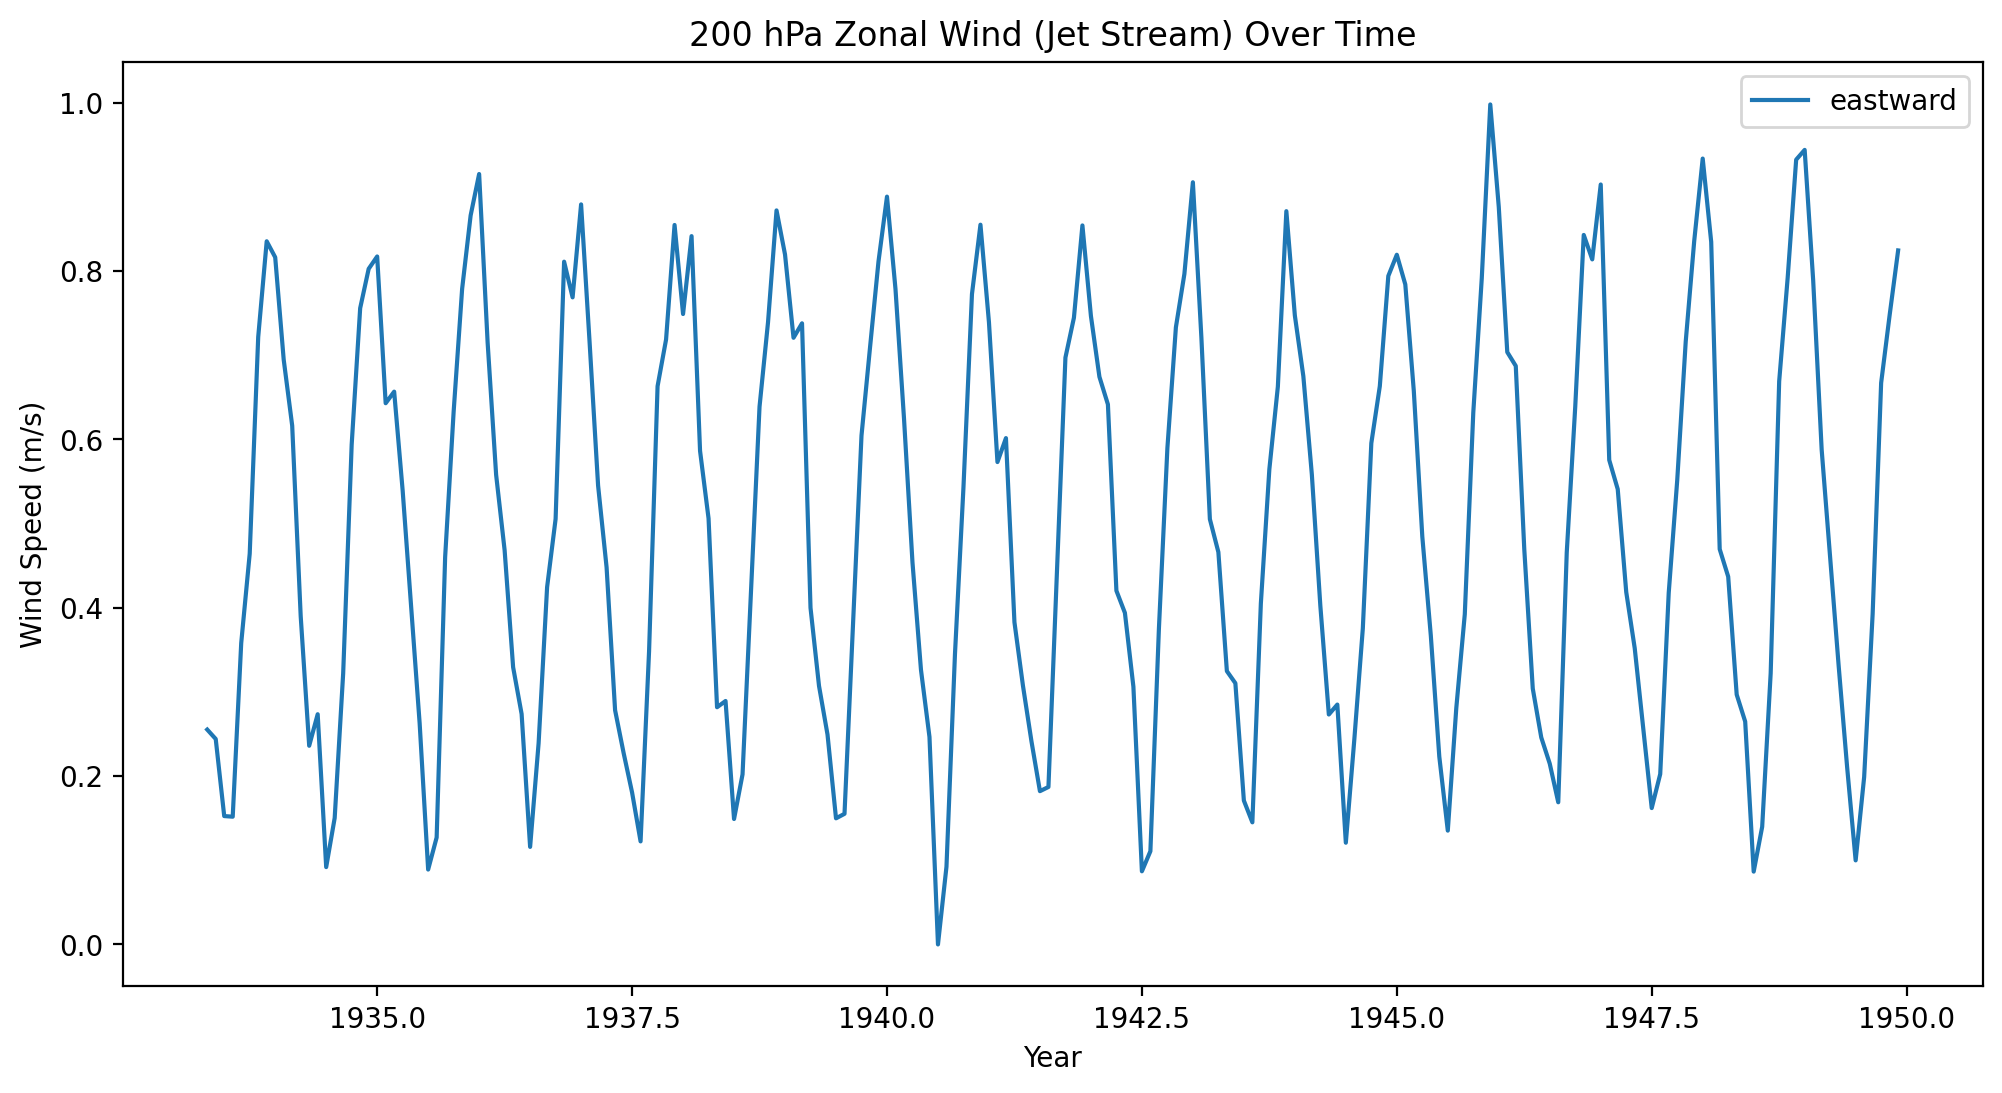

In [44]:
plt.plot(time[time_left: time_right], wind_data_nmlzd[time_left: time_right], label = "eastward")
# plt.plot(time[time_left: time_right], wind_v_np[time_left: time_right], label = "northward")
plt.title("200 hPa Zonal Wind (Jet Stream) Over Time")
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.show()

In [45]:
# Define function for thresholding
def wavelet_thresholding(y, method='soft', wavelet='db1'):
    coeffs = pywt.wavedec(y, wavelet)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745  # Estimate noise level
    threshold = sigma * np.sqrt(2 * np.log(len(y)))
    
    if method == 'soft':
        coeffs_thresh = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    else:
        coeffs_thresh = [pywt.threshold(c, threshold, mode='hard') for c in coeffs]
    
    return pywt.waverec(coeffs_thresh, wavelet)


# Apply wavelet thresholding
theta_WT_soft = wavelet_thresholding(wind_data, method='soft')
theta_WT_hard = wavelet_thresholding(wind_data, method='hard')



# Mean Squared Error (MSE)
# mse_soft = np.mean((theta_WT_soft - wind_data) ** 2)
# mse_hard = np.mean((theta_WT_hard - wind_data) ** 2)
# print(f'MSE Soft Thresholding: {mse_soft}')
# print(f'MSE Hard Thresholding: {mse_hard}')


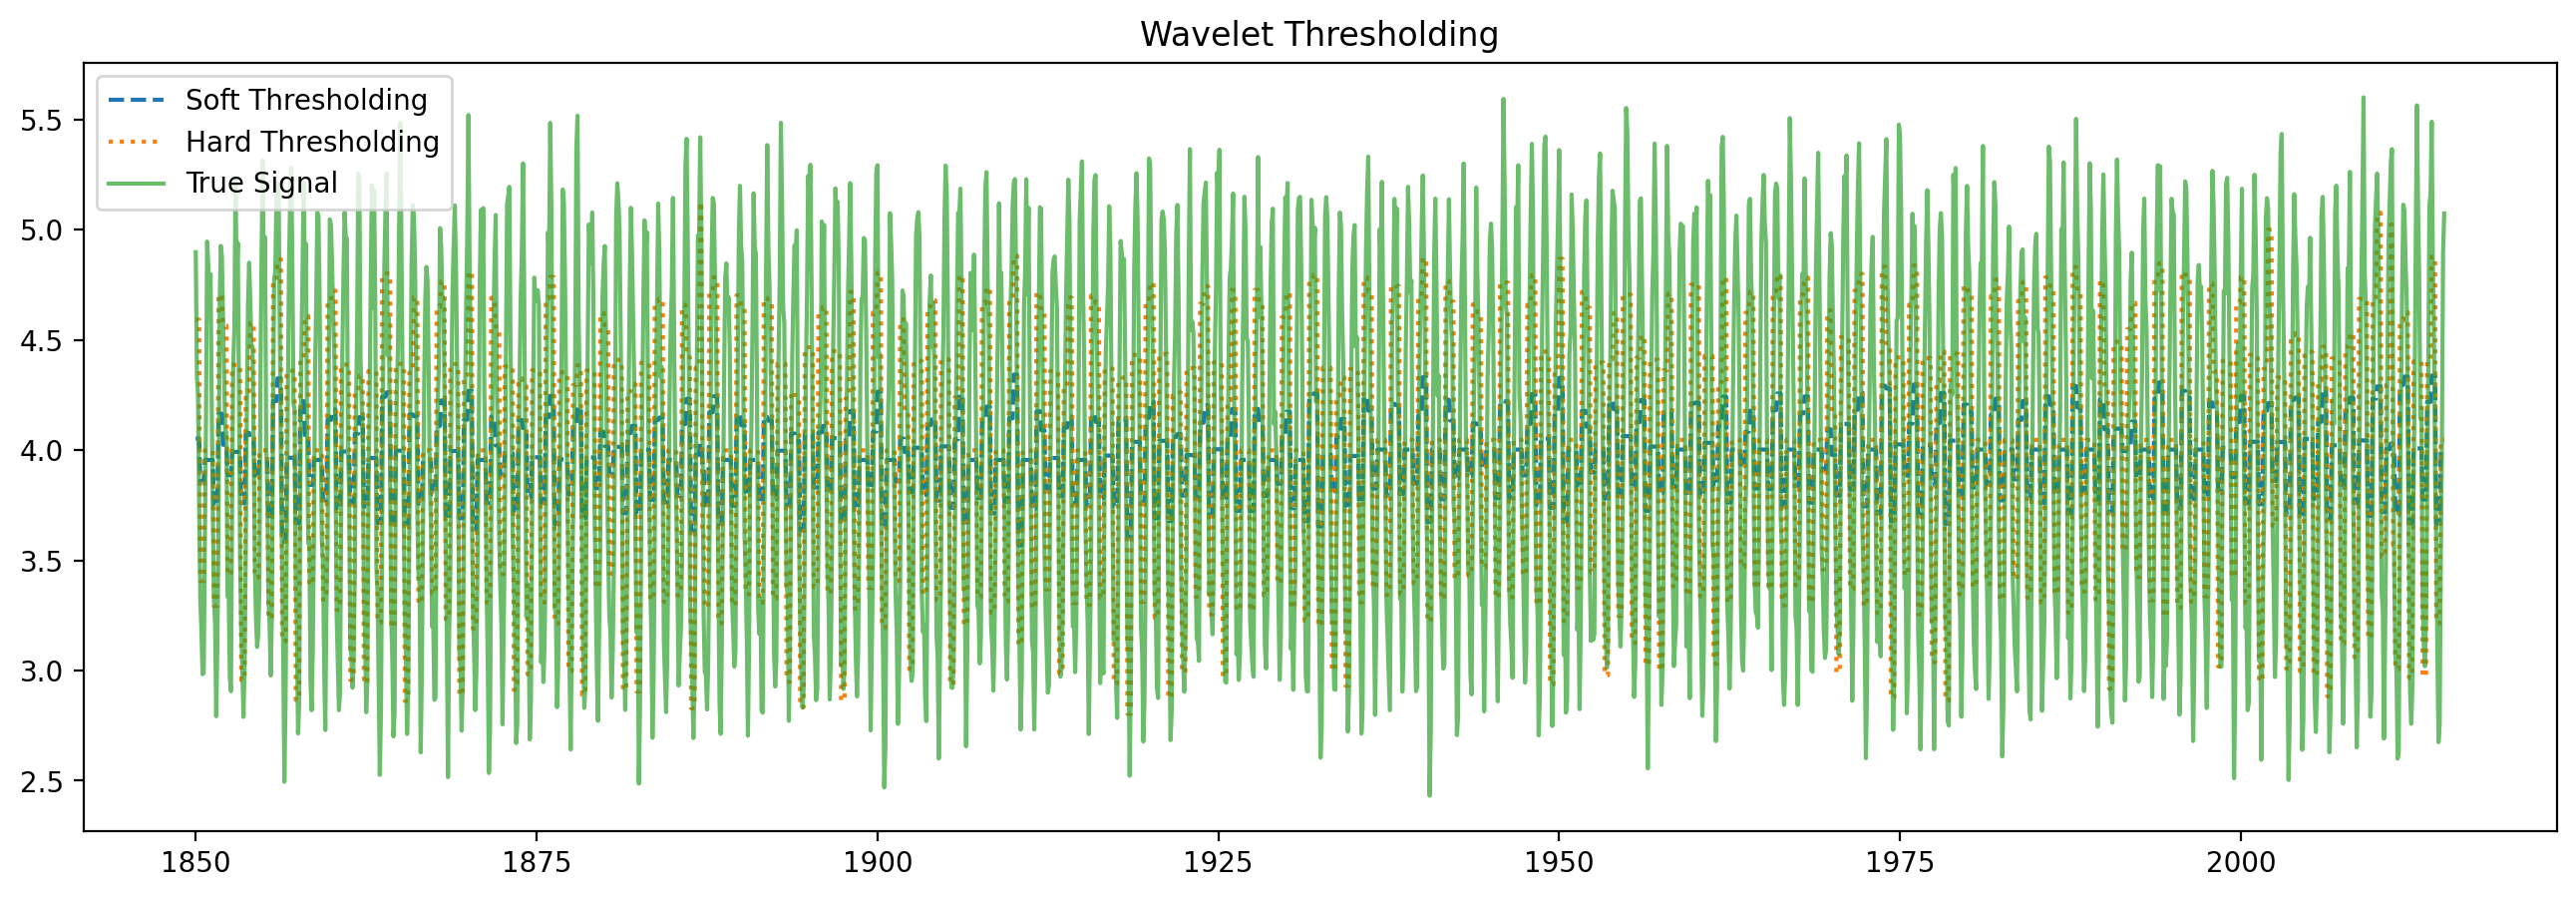

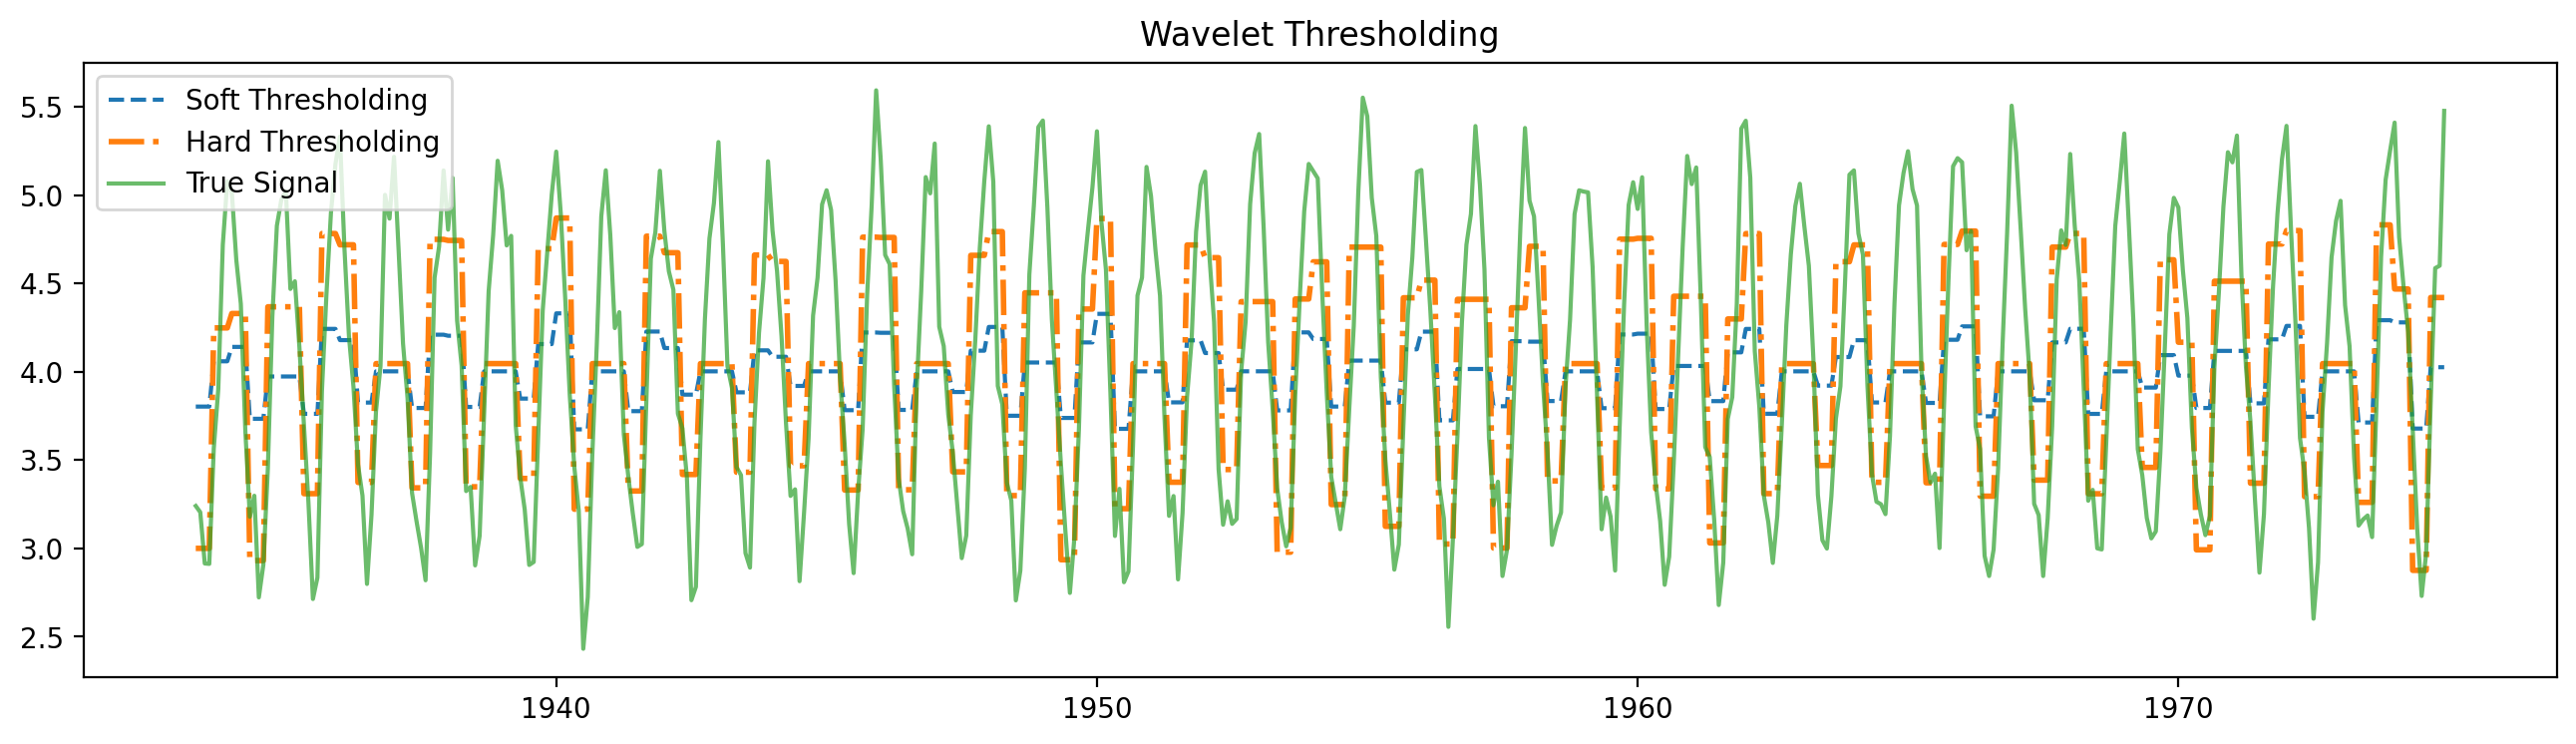

In [55]:
# Visualization
plt.figure(figsize=(16,5))
plt.plot(time, theta_WT_soft, label='Soft Thresholding', linestyle='--')
plt.plot(time, theta_WT_hard, label='Hard Thresholding', linestyle=':')
plt.plot(time, wind_data, label='True Signal', alpha=0.7)
plt.legend()
plt.title('Wavelet Thresholding')
plt.show()

# Visualization
plt.figure(figsize=(16,4))
plt.plot(time[1000:1500], theta_WT_soft[1000:1500], label='Soft Thresholding', linestyle='--')
plt.plot(time[1000:1500], theta_WT_hard[1000:1500], label='Hard Thresholding', linestyle='-.', linewidth=2)
plt.plot(time[1000:1500], wind_data[1000:1500], label='True Signal', alpha=0.7)
plt.legend()
plt.title('Wavelet Thresholding')
plt.show()

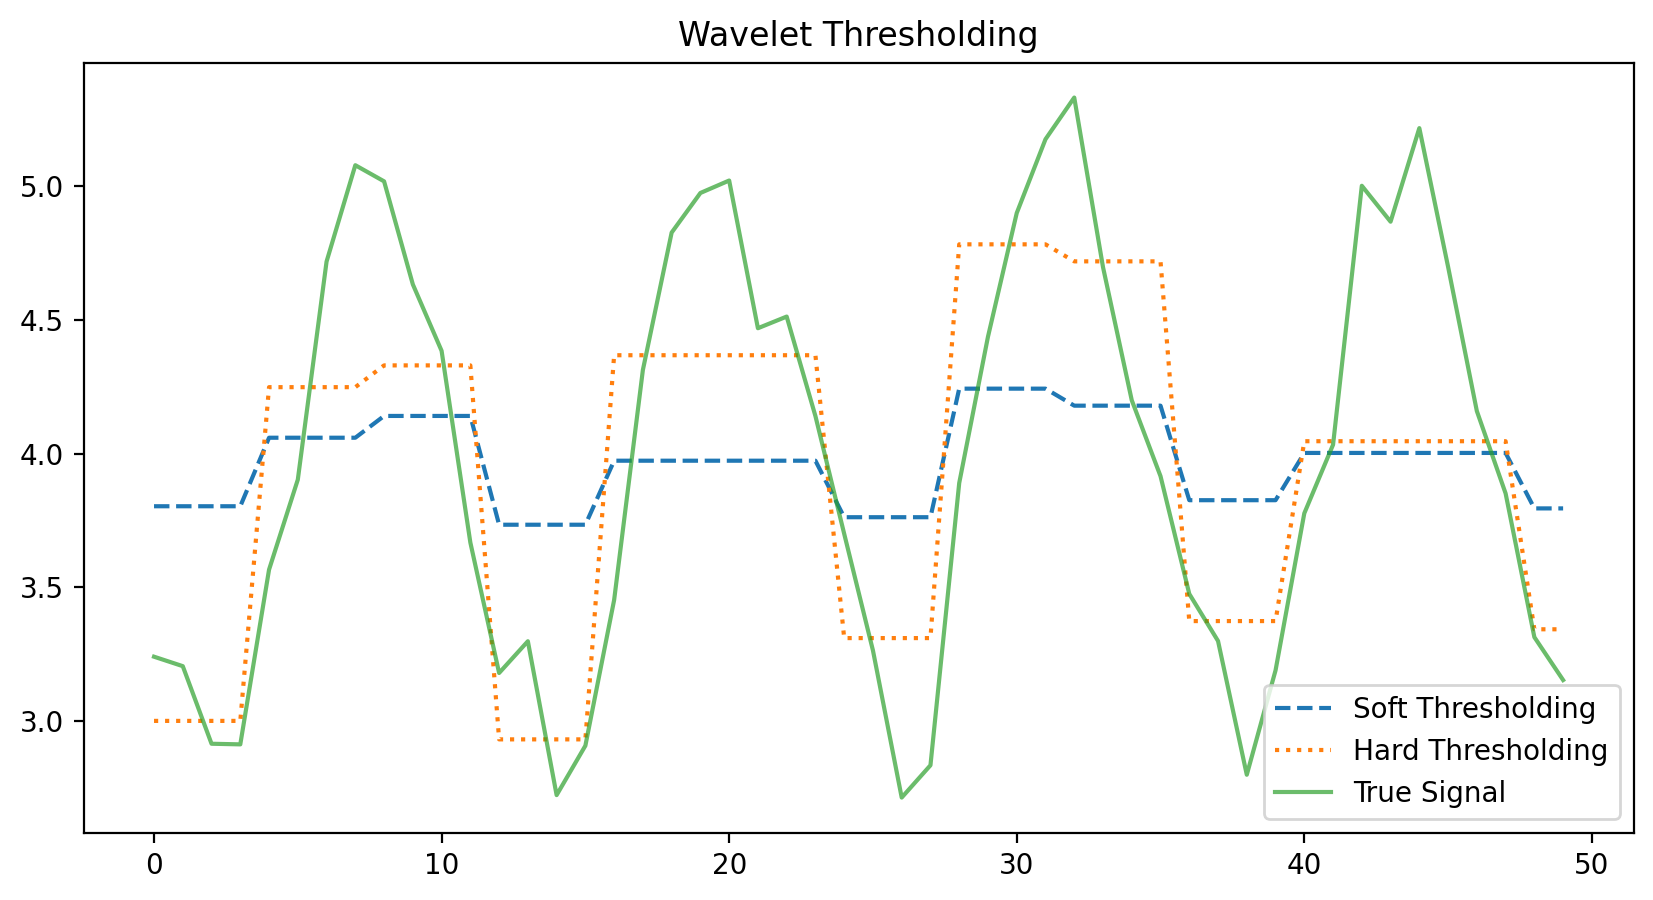

In [47]:
# Visualization
plt.figure(figsize=(10,5))
plt.plot(theta_WT_soft[1000:1050], label='Soft Thresholding', linestyle='--')
plt.plot(theta_WT_hard[1000:1050], label='Hard Thresholding', linestyle=':')
plt.plot(wind_data[1000:1050], label='True Signal', alpha=0.7)
plt.legend()
plt.title('Wavelet Thresholding')
plt.show()

In [52]:
display(wind_data[:])

array([4.8974795, 4.3345866, 4.2461724, ..., 4.033554 , 4.8906226,
       5.0732493], dtype=float32)